In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/TATAMOTORS.csv


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
dataset=pd.read_csv('/kaggle/input/dataset/TATAMOTORS.csv')

In [37]:
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.40,217.00,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.00,211.90,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.00,213.10,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.00,222.00,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.10,239.90,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TATAMOTORS,EQ,294.00,297.0,299.00,294.60,295.85,295.40,296.48,30583139,9.067386e+14,173282.0,3291167.0,0.1076
5302,2021-04-27,TATAMOTORS,EQ,295.40,295.7,302.50,295.10,302.10,301.50,299.05,35040532,1.047879e+15,191627.0,5215100.0,0.1488
5303,2021-04-28,TATAMOTORS,EQ,301.50,303.5,309.50,303.00,305.15,305.90,307.22,44668126,1.372278e+15,264159.0,5116568.0,0.1145
5304,2021-04-29,TATAMOTORS,EQ,305.90,308.9,310.00,301.25,302.20,301.90,304.77,36647292,1.116900e+15,186996.0,4193346.0,0.1144


In [38]:
avg_price=dataset['VWAP']

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [40]:
values=[]
values.append([avg_price[0]])
for i in range(1,len(avg_price)):
    arr = values[-1].copy()
    arr.append(avg_price[i])
    values.append(arr)



In [41]:
values = pad_sequences(values, maxlen=5306, dtype='float32')

In [42]:
values =np.array(values)

In [43]:
train_values=values[1000:4000,-500:]
pred_val= train_values[:,-1]

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Bidirectional,Softmax,Embedding,BatchNormalization

In [45]:
embedding_layer = Embedding(input_dim=10000, output_dim=100)

In [46]:
model=Sequential()
model.add(embedding_layer)
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(500,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(500,return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(1))
model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mean_absolute_error'])

In [47]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:


def plot_history(history):
    acc = history.history['mean_absolute_error']
    val_acc = history.history['val_mean_absolute_error']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()

    # Plot loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

In [49]:
history = model.fit(train_values[:,:-1], pred_val, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 424ms/step - loss: 75.5506 - mean_absolute_error: 455.9878 - val_loss: 19.4383 - val_mean_absolute_error: 92.7094
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - loss: 46.5258 - mean_absolute_error: 287.7951 - val_loss: 16.7473 - val_mean_absolute_error: 79.8742
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 401ms/step - loss: 46.3630 - mean_absolute_error: 286.3214 - val_loss: 15.1114 - val_mean_absolute_error: 71.5355
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 406ms/step - loss: 46.9616 - mean_absolute_error: 280.1035 - val_loss: 16.7676 - val_mean_absolute_error: 79.9739
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - loss: 46.8215 - mean_absolute_error: 282.9366 - val_loss: 19.2091 - val_mean_absolute_error: 91.7162
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - loss: 43.2417 - mean_absolute_error: 264.5128 - val_loss: 16.6412 - val_mean_absolute_error: 78.1412
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - loss: 42.

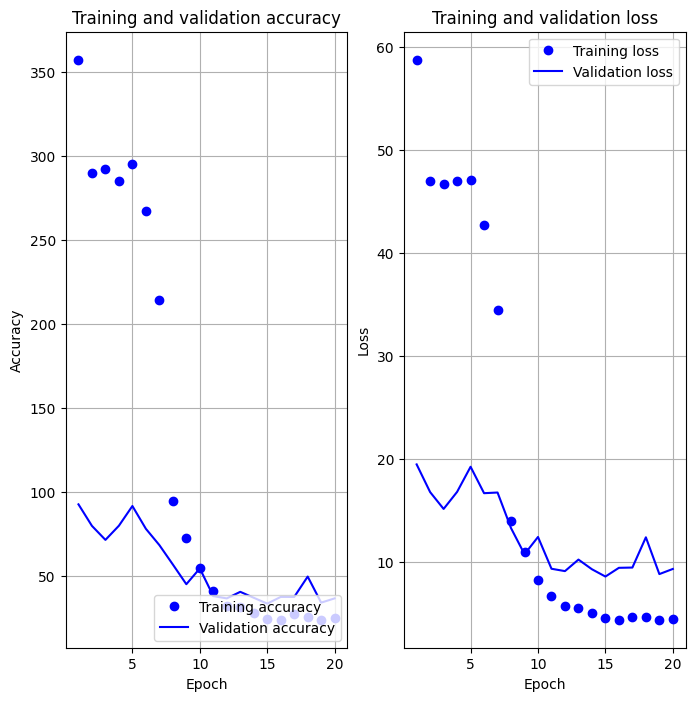

In [50]:
plot_history(history)

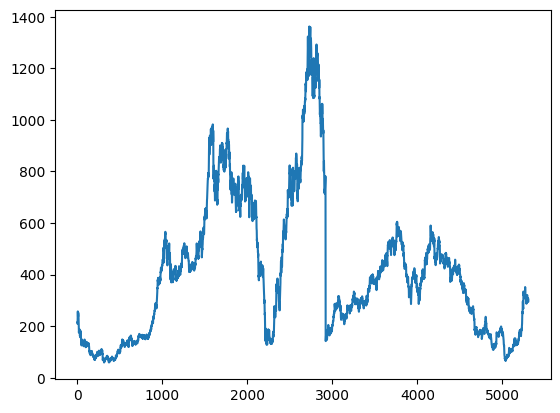

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 2D NumPy array


# Plot the array as an image
plt.plot(avg_price)

plt.show()

In [52]:
test_pred=model.predict(values[4000:,-500:-1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step


In [53]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse =mean_squared_error(values[4000:,-1],test_pred)
mae =mean_absolute_error(values[4000:,-1],test_pred)
print(mse,mae)

16834.973 65.9462
